In [107]:
#Final Project SVM across time of HFOs
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [64]:
#Functions for loading and plotting, and crossvalidating models

def load_GEC_and_plot(file_n_p, seiz_ind_array): #number of cols in seiz_ind_array has to equal the number of time buckets in file_n_p
    
    GEC_matrix = scipy.io.loadmat(file_n_p)
    keys = (list(GEC_matrix.keys()))
    print(keys)
    label = keys[-1]
    print(label)

    GEC_Matrix_Py = (GEC_matrix.get(label))
    

    GEC_Matrix_Py_trim = np.empty((np.size(GEC_Matrix_Py, 0), np.size(GEC_Matrix_Py, 1)-1), dtype = object)

    for i in range(0,np.size(GEC_Matrix_Py, 0)):
        GEC_Matrix_Py[i][:][:] = np.triu(GEC_Matrix_Py[i][:][:])
        j = (np.size(GEC_Matrix_Py, 1) - (i+1))
        for r in range( 0, np.size(GEC_Matrix_Py, 1)-1):
            GEC_Matrix_Py_trim[i][r] = np.trim_zeros(GEC_Matrix_Py[i][r][:])    


    GEC_VALS_ALL_TIME = []
    for a in range(0,np.size(GEC_Matrix_Py, 0)):
        Matrix_of_time_couples = []
        for c in range(0, np.size(GEC_Matrix_Py,1)-1):
            time_val = []
            for b in range (0, np.size(GEC_Matrix_Py_trim[a][c])):
                x = (GEC_Matrix_Py_trim[a][c][b])
                time_val.append(x)
            Matrix_of_time_couples = np.append(Matrix_of_time_couples, time_val)
        GEC_VALS_ALL_TIME.append(Matrix_of_time_couples)
    GEC_VALS_ALL_TIME_ARRAY = np.array(GEC_VALS_ALL_TIME)

    #print(GEC_VALS_ALL_TIME_ARRAY)
    GEC_CH_Times_Matrix = GEC_VALS_ALL_TIME_ARRAY.T #This returns the matrix as Channels vs time
    GEC_sum = np.sum(GEC_VALS_ALL_TIME_ARRAY, 0)
    
    total_time_range = (np.size(GEC_VALS_ALL_TIME_ARRAY,0)) +1

    times = np.arange(1, total_time_range ,1)
   
    y =  seiz_ind_array
    
    model = SVC(kernel='rbf', C=1E10)
    model.fit(GEC_VALS_ALL_TIME_ARRAY, y)
    
    plt.figure()
    All_Vals = np.ndarray.flatten(GEC_VALS_ALL_TIME_ARRAY)
    plt.hist(All_Vals, 10);
    
    plt.figure()
    for i in range(0, np.size(GEC_CH_Times_Matrix, 0)):
        plt.scatter(times, GEC_CH_Times_Matrix[i])
    
    skf = StratifiedKFold(n_splits=3)
    
    y_pred = cross_val_predict(model, GEC_VALS_ALL_TIME_ARRAY, y, cv=skf)
    print("cross-validated estimates for each input data point")
    print(y_pred)

    cvs = cross_val_score(model, GEC_VALS_ALL_TIME_ARRAY, y, cv=skf)
    print("score by cross-validation")
    print(np.sum(cvs)/np.size(cvs))
    
    return GEC_VALS_ALL_TIME_ARRAY, GEC_CH_Times_Matrix
    
    
def plot_and_GEC(GEC_Matrix, y_seiz_ind_array):
    GEC_VALS_ALL_TIME_ARRAY = GEC_Matrix
    GEC_CH_Times_Matrix = GEC_VALS_ALL_TIME_ARRAY.T #This returns the matrix as Channels vs time
    GEC_sum = np.sum(GEC_VALS_ALL_TIME_ARRAY, 0)
    
    total_time_range = (np.size(GEC_VALS_ALL_TIME_ARRAY,0)) +1

    times = np.arange(1, total_time_range ,1)
   
    y =  y_seiz_ind_array
    
    plt.figure()
    All_Vals = np.ndarray.flatten(GEC_VALS_ALL_TIME_ARRAY)
    plt.hist(All_Vals, 10);
    plt.title("Histogram of GEC Values")
    
    plt.figure()
    for i in range(0, np.size(GEC_CH_Times_Matrix, 0)):
        plt.scatter(times, GEC_CH_Times_Matrix[i])
    plt.xlabel("bins of 30 sec epocs where GEC matrices where calculated")
    plt.ylabel("GEC Values")
    plt.title("GEC Values")
    
    skf = StratifiedKFold(n_splits=6)
    
   
    
    return GEC_VALS_ALL_TIME_ARRAY, GEC_CH_Times_Matrix


def load_GEC_file_only(file_n_p):
    GEC_matrix = scipy.io.loadmat(file_n_p)
    
    #print(GEC_header)
    keys = (list(GEC_matrix.keys()))
    label = keys[-1]

    GEC_Matrix_Py = (GEC_matrix.get(label))
    print(np.size(GEC_Matrix_Py,0))
    

    GEC_Matrix_Py_trim = np.empty((np.size(GEC_Matrix_Py, 0), np.size(GEC_Matrix_Py, 1)-1), dtype = object)

    for i in range(0,np.size(GEC_Matrix_Py, 0)):
        GEC_Matrix_Py[i][:][:] = np.triu(GEC_Matrix_Py[i][:][:])
        j = (np.size(GEC_Matrix_Py, 1) - (i+1))
        for r in range( 0, np.size(GEC_Matrix_Py, 1)-1):
            GEC_Matrix_Py_trim[i][r] = np.trim_zeros(GEC_Matrix_Py[i][r][:])    


    GEC_VALS_ALL_TIME = []
    for a in range(0,np.size(GEC_Matrix_Py, 0)):
        Matrix_of_time_couples = []
        for c in range(0, np.size(GEC_Matrix_Py,1)-1):
            time_val = []
            for b in range (0, np.size(GEC_Matrix_Py_trim[a][c])):
                x = (GEC_Matrix_Py_trim[a][c][b])
                time_val.append(x)
            Matrix_of_time_couples = np.append(Matrix_of_time_couples, time_val)
        GEC_VALS_ALL_TIME.append(Matrix_of_time_couples)
    GEC_VALS_ALL_TIME_ARRAY = np.array(GEC_VALS_ALL_TIME)
    
    ysize = np.size(GEC_VALS_ALL_TIME_ARRAY,0)
    
    return GEC_VALS_ALL_TIME_ARRAY, ysize



In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

19


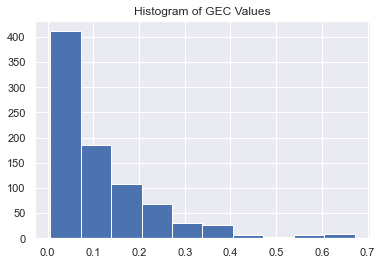

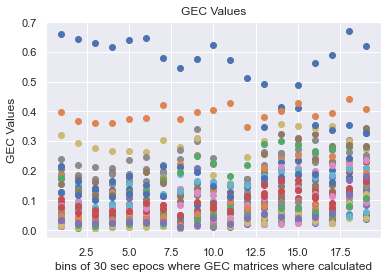

In [66]:
file_R3404_data = 'Seizures_Cesar_Rat\S1_Day_0_Rat_3404_GEC_hilbert.mat'
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = [0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0]
GEC_R3404, GEC_R3404_T = plot_and_GEC(GEC_R3404, y_a)
GEC_R3404_S1 = GEC_R3404

In [120]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

model = SVC(kernel='rbf', C=1E10, probability = True)
model.fit(GEC_R3404_S1, y_a)

prob_2 = model.predict_proba(GEC_R3404_S1)
print("cross-validated estimate probabilities for each input data point (row: block or time) and which class(col: 1= not seizure, 2 = seizure)")
print(prob_2)

skf = 6 #As many as permited by smallest group (returned the best score solution, overfitting not affecting due to stratification in the groups)
cvp = cross_val_predict(model, GEC_R3404_S1, y_a, cv=skf)
print("cross-validated estimated class for each input data point")
print(cvp)

cvs = cross_val_score(model, GEC_R3404_S1, y_a, cv = skf)
print("score by cross-validation:")
print("Each fold:")
print(cvs)
print("Average Score across all folds:")
print(np.sum(cvs)/np.size(cvs))
print()
print("area under ROC:")
print(roc_auc_score(y_a, model.predict_proba(GEC_R3404_S1)[:,1]))

print("Signed (labeled psotive or negative based on side of hyperplane) proportional distance from hyperplane")
print(model.decision_function(GEC_R3404_S1))
print()
print("Confusion Matrix:")
pred = model.predict(GEC_R3404_S1)
confusion_matrix(y_a, pred)

19
cross-validated estimate probabilities for each input data point (row: block or time) and which class(col: 1= not seizure, 2 = seizure)
[[8.03899254e-01 1.96100746e-01]
 [8.11855131e-01 1.88144869e-01]
 [8.03903357e-01 1.96096643e-01]
 [8.03852516e-01 1.96147484e-01]
 [8.03911289e-01 1.96088711e-01]
 [8.63798000e-01 1.36202000e-01]
 [1.51715137e-01 8.48284863e-01]
 [3.22881819e-02 9.67711818e-01]
 [8.86588956e-02 9.11341104e-01]
 [1.51682656e-01 8.48317344e-01]
 [1.51715111e-01 8.48284889e-01]
 [1.51769496e-01 8.48230504e-01]
 [8.03993731e-01 1.96006269e-01]
 [9.00078290e-01 9.99217096e-02]
 [9.67403438e-01 3.25965619e-02]
 [9.65868429e-01 3.41315714e-02]
 [9.18639218e-01 8.13607821e-02]
 [9.97471241e-01 2.52875918e-03]
 [9.99175081e-01 8.24919116e-04]]
cross-validated estimated class for each input data point
[0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
score by cross-validation:
Each fold:
[0.75 1.   1.   1.   1.   1.  ]
Average Score across all folds:
0.9583333333333334

area under RO

array([[13,  0],
       [ 0,  6]], dtype=int64)

19


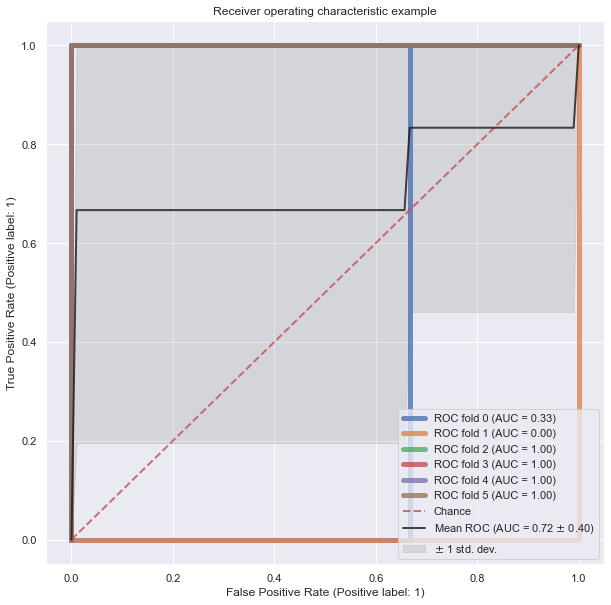

In [71]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
X = GEC_R3404_S1
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])
y = np.array(y_a)

random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=6)
classifier = SVC(kernel="rbf", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.8,
        lw=5,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="k",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

19
Explained Variance by each Principle Component
[0.69225462 0.12229776]
cross-validated estimates for each input data point
[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1]
score by cross-validation
[0.75       1.         0.66666667 0.66666667 1.         0.33333333]
0.736111111111111


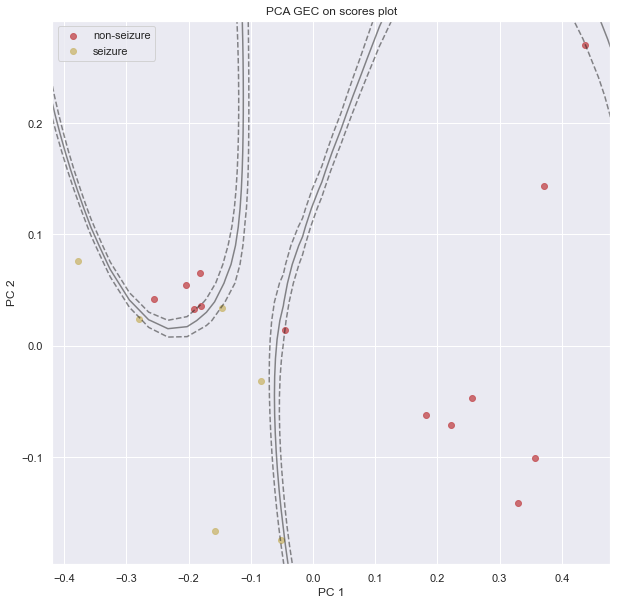

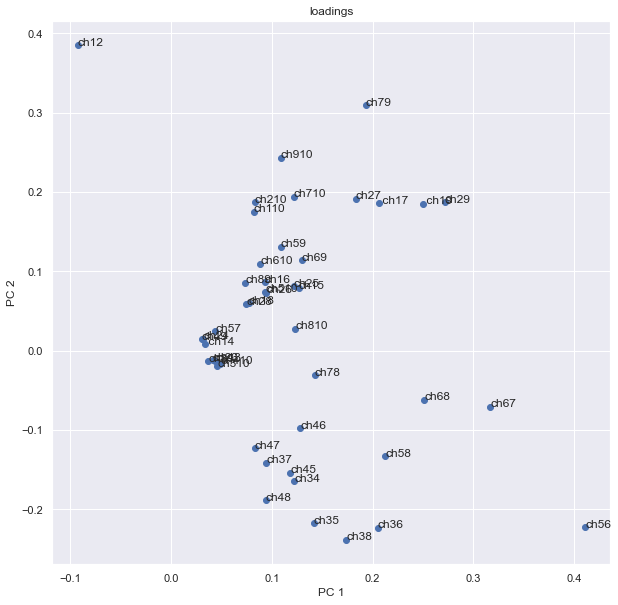

In [146]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
X = GEC_R3404_S1
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

ncomp = 2
pca = PCA(n_components=ncomp)
GEC_PCA = pca.fit_transform(GEC_R3404_S1)
loading_points = pca.components_
print("Explained Variance by each Principle Component")
print(pca.explained_variance_ratio_)

#score for first data point
#print(GEC_PCA[0,:])

#loadings point 1
#print(loading_points[:,:])
colors = np.array(['r', 'y'])
plt.figure(figsize = (10,10))
target_names = np.array(['non-seizure', 'seizure'])
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(GEC_PCA[y == i, 0], GEC_PCA[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA GEC on scores plot')
plt.xlabel("PC 1")
plt.ylabel("PC 2");



y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

model = SVC(kernel='rbf', C=1E10, probability = True)
model.fit(GEC_PCA, y_a)

skf = 6 #As many as permited by smallest group
cvp = cross_val_predict(model, GEC_PCA, y_a, cv=skf)
print("cross-validated estimates for each input data point")
print(cvp)

cvs = cross_val_score(model, GEC_PCA, y_a, cv = skf)
print("score by cross-validation")
print(cvs)
print(np.sum(cvs)/np.size(cvs))


plot_svc_decision_function(model);

plt.figure(figsize = (10,10))
plt.scatter(loading_points[0,:],loading_points[1,:])
plt.title("loadings")
plt.xlabel("PC 1")
plt.ylabel("PC 2");
fconn_names = ['ch12', 'ch13',' ch14', 'ch15', 'ch16',' ch17', 'ch18',' ch19', 'ch110', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29','ch210', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39','ch310', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49','ch410', 'ch56', 'ch57', 'ch58', 'ch59','ch510', 'ch67', 'ch68', 'ch69','ch610', 'ch78', 'ch79', 'ch710', 'ch89', 'ch810', 'ch910']
for i, label in enumerate(fconn_names):
    plt.text(loading_points[0,i], loading_points[1,i],label)

19


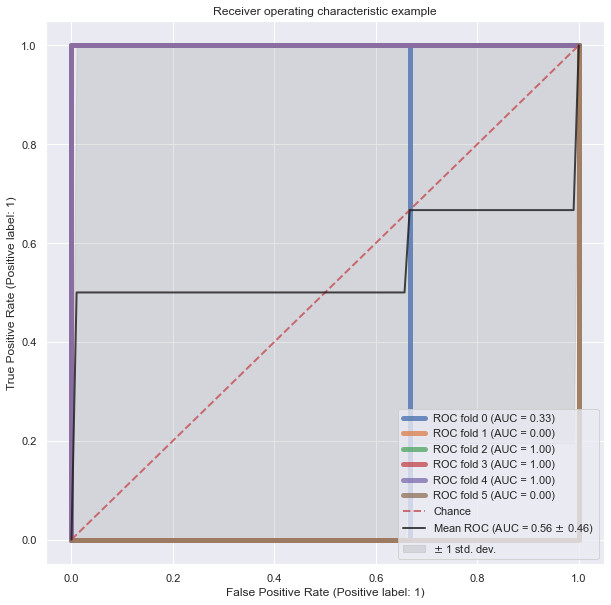

In [89]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

ncomp = 2
pca = PCA(n_components=ncomp)
GEC_PCA = pca.fit_transform(GEC_R3404_S1)

X = GEC_PCA
y = np.array(y_a)

random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=6)
classifier = SVC(kernel="rbf", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.8,
        lw=5,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="k",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [90]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

model = SVC(kernel='linear', C=1E10)
model.fit(GEC_R3404_S1, y_a)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

skf = 6 #As many as permited by smallest group
cvp = cross_val_predict(model, GEC_R3404_S1, y_a, cv=skf)
print("cross-validated estimates for each input data point")
print(cvp)

cvs = cross_val_score(model, GEC_R3404_S1, y_a, cv=skf)
print("score by cross-validation")
print(np.sum(cvs)/np.size(cvs))

19
cross-validated estimates for each input data point
[0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0]
score by cross-validation
0.8472222222222222


In [91]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

model = SVC(kernel='poly', C=1E10)
model.fit(GEC_R3404_S1, y_a)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

skf = 6 #As many as permited by smallest group
cvp = cross_val_predict(model, GEC_R3404_S1, y_a, cv=skf)
print("cross-validated estimates for each input data point")
print(cvp)

cvs = cross_val_score(model, GEC_R3404_S1, y_a, cv=skf)
print("score by cross-validation")
print(np.sum(cvs)/np.size(cvs))

19
cross-validated estimates for each input data point
[0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0]
score by cross-validation
0.8472222222222222


In [92]:
GEC_R3404, y_a = load_GEC_file_only(file_R3404_data)
GEC_R3404_S1 = GEC_R3404
y_a = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0])

model = SVC(kernel='sigmoid', C=1E10)
model.fit(GEC_R3404_S1, y_a)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

skf = 6 #As many as permited by smallest group
cvp = cross_val_predict(model, GEC_R3404_S1, y_a, cv=skf)
print("cross-validated estimates for each input data point")
print(cvp)

cvs = cross_val_score(model, GEC_R3404_S1, y_a, cv=skf)
print("score by cross-validation")
print(np.sum(cvs)/np.size(cvs))

19
cross-validated estimates for each input data point
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
score by cross-validation
0.40277777777777773


In [52]:


#file = 'Rat_3057\Day_5\Rat_3057_GEC_D5.mat'
#GEC_R3057, y_s = load_GEC_file_only(file)
#y = np.zeros((y_s))
#y[8:10] = 1
#y[14:16] = 1
#y[20:24] = 1
#print(y)
#GEC_R3057_D5, GEC_R3057_T = plot_and_score_GEC(GEC_R3057, y)


In [284]:
#way to check out header to then add labels to plot
#GEC_header = scipy.io.loadmat('Rat_3057\Day_5\Rat_3057_header_D5.mat')
#header_keys = list(GEC_header.keys())


In [53]:
#file = 'Rat_3057\Day_5\Rat_3057_GEC_D5_Wavelet.mat'
#GEC_R3057_wave, y_s_wave = load_GEC_file_only(file)
#y = np.zeros((y_s_wave))
#y[2:10] = 1
#print(y)
#GEC_R3057_D5_wave, GEC_R3057_T_wave = plot_and_score_GEC(GEC_R3057_wave, y)

In [54]:
#file = '3168\D13\clean\R3168_GEC_matrix_wavelet.mat'
#GEC_R3057_wave, y_s_wave = load_GEC_file_only(file)
#y = np.zeros((y_s_wave))
#y[17:20] = 1
#print(y)
#GEC_R3057_D5_wave, GEC_R3057_T_wave = plot_and_score_GEC(GEC_R3057_wave, y)

In [56]:
#Rat_3168_TBI_D13

#Was incorrect data
"""
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0]
file_name = '3168\D13\clean\R3168_GEC_matrix.mat'
GEC_time_vs_Ch, GEC_ch_vs_time = load_GEC_and_plot(file_name, y)
y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
model = SVC(kernel='rbf', C=1E10)
model.fit(GEC_ch_vs_time, y)
print()
print()

skf = StratifiedKFold(n_splits=2)
y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]    
y_pred = cross_val_predict(model, GEC_ch_vs_time, y, cv=skf)
print("cross-validated estimates for each input data point")
print(y_pred)
y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
cvs = cross_val_score(model, GEC_ch_vs_time, y, cv=skf)
print("score by cross-validation")
print(np.sum(cvs)/np.size(cvs))

ncomp = 2
pca = PCA(n_components=ncomp)
GEC_PCA = pca.fit_transform(GEC_ch_vs_time)

y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
model = SVC(kernel='linear', C=1E10)
model.fit(GEC_PCA , y)
print()
print()

skf = StratifiedKFold(n_splits=2)
y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]    
y_pred = cross_val_predict(model, GEC_ch_vs_time, y, cv=skf)
print("cross-validated estimates for each input data point")
print(y_pred)
y = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
cvs = cross_val_score(model, GEC_ch_vs_time, y, cv=skf)
print("score by cross-validation")
print(np.sum(cvs)/np.size(cvs))

# Print PC1 loading
#print(pca.components_[:, 0])

# Print scores of first data point
print(pca.components_)

print()
print(pca.explained_variance_ratio_)
print()
print("Explained Variance")
print(np.sum(pca.explained_variance_ratio_))
print()
#plt.plot(np.arange(ncomp), pca.explained_variance_ratio_)


colors = ['navy', 'darkorange']
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0]
y =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
labels = ['No-HFO', 'HFO']
#plt.scatter(GEC_PCA[:,0], GEC_PCA[:,1]) #color=color, alpha=.8, label = labels)


#plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1], c=['b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','r','r','r','b'])
plt.figure()
plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1])

plt.title('PCA of dataset')
plt.xlabel("PC 1")
plt.ylabel("PC 2");

plt.figure()
plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1], c=['b','b','b','b','r','b','b','b','b','r','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b'])
plot_svc_decision_function(model)
"""

'\ny = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0]\nfile_name = \'3168\\D13\\clean\\R3168_GEC_matrix.mat\'\nGEC_time_vs_Ch, GEC_ch_vs_time = load_GEC_and_plot(file_name, y)\ny = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]\nmodel = SVC(kernel=\'rbf\', C=1E10)\nmodel.fit(GEC_ch_vs_time, y)\nprint()\nprint()\n\nskf = StratifiedKFold(n_splits=2)\ny = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]    \ny_pred = cross_val_predict(model, GEC_ch_vs_time, y, cv=skf)\nprint("cross-validated estimates for each input data point")\nprint(y_pred)\ny = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]\ncvs = cross_val_score(model, GEC_ch_vs_time, y, cv=skf)\nprint("score by cross-validation")\nprint(np.sum(cvs)/np.size(cvs))\n\nncomp = 2\npca = PCA(n_components=ncomp)\nGEC_PCA = pca.fit_transform(GEC_ch_vs_time)\n\ny = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]\nmodel = SVC(kernel=\

In [57]:
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
#file_name = 'GEC_Sample_Matrix_Fconn.mat'
#GEC_time_vs_Ch, GEC_ch_vs_time = load_GEC_and_plot(file_name, y)

In [58]:
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]
#file_name = 'GEC_Sample_Matrix_Fconn_wavelet.mat'
#GEC_time_vs_Ch, GEC_ch_vs_time = load_GEC_and_plot(file_name, y)

In [61]:
#Rat_3087_(Sham)_D13

#file = '3087_sham\D13\clean\GEC_matrix_3087.mat'
#GEC_Time_vs_ch_R3087, y_size_R3087 = load_GEC_file_only(file)

In [59]:
#PCA for analysis
#ncomp = 2
#pca = PCA(n_components=ncomp)
#GEC_PCA = pca.fit_transform(GEC_time_vs_Ch)

# Print PC1 loading
#print(pca.components_[:, 0])

# Print scores of first data point
#print(pca.components_)

#print()
#print(pca.explained_variance_ratio_)
#print()
#print("Explained Variance")
#print(np.sum(pca.explained_variance_ratio_))
#print()
#plt.plot(np.arange(ncomp), pca.explained_variance_ratio_)



In [60]:
#plotting PCA

#colors = ['navy', 'darkorange']
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0]
#y =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
#labels = ['No-HFO', 'HFO']
#plt.scatter(GEC_PCA[:,0], GEC_PCA[:,1]) #color=color, alpha=.8, label = labels)


#plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1], c=['b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','r','r','r','b'])

#plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1], c=['b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','r','r','b','b'])

#plt.title('PCA of dataset')
#plt.xlabel("PC 1")
#plt.ylabel("PC 2");

In [ ]:
#applying svc model to pca components
#need to fix for inputs
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0]
#y =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
#model = SVC(kernel='linear', C=1E10)
#model.fit(GEC_PCA, y)

In [220]:
#plot svc with pca
# need to fix

#plt.scatter(GEC_PCA[:, 0], GEC_PCA[:, 1], c=y, s=50, cmap='autumn')
#plot_svc_decision_function(model);


In [215]:
#correct cross validation (just done not in function) 

#y_pred = cross_val_predict(model, GEC_VALS_ALL_TIME_ARRAY, y, cv=7)
#print("cross-validated estimates for each input data point")
#print(y_pred)
#y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0]
#cv_score = cross_val_score(model, GEC_VALS_ALL_TIME_ARRAY, y, cv=7)
#print("score by cross-validation")
#print(cv_score)



In [ ]:
#Wrong cross val

#leaveOO = LeaveOneOut()
#GECX = GEC_VALS_ALL_TIME_ARRAY
#y = np.array(y)
#leave_one_out_ind = np.arange(len(GECX))
#predict_test_vals = np.zeros(len(y))

#for train_index, test_index in leaveOO.split(leave_one_out_ind):
#    trainGX = GECX[train_index]
#    trainY = y[train_index]
#    model_co = SVC(kernel='rbf', C=1E10)
#    model_co.fit(trainGX, trainY)
#    predict_test_vals[test_index] = model_co.predict(GECX[test_index])
#     
#    #print(pls4co.score(XX,Y4))
#print(predict_test_vals)
#    
#    
#    
#print("R2 score for the orginal data: ", model_co.score(GECX,y))

In [221]:
#Wrong cross vall
#X_train, X_test, y_train, y_test = train_test_split(GECX, y, test_size=0.1, random_state=0)#
#
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

#model_co = SVC(kernel='rbf', C=1E10).fit(X_train, y_train)
#model_co.score(X_test, y_test)